In [1]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import Word, TextBlob
from wordcloud import WordCloud
filterwarnings('ignore')
import nltk
import swifter



#  1-WhatsApp Dosyalarını Açma ve DataFrame Biçimine İşleme

1. **Veri Hazırlığı**: WhatsApp sohbet verisi bir sözlük içinde `Mesajlar` adı altında toplanır.
   
2. **DataFrame Oluşturma**: Veriler, Pandas kütüphanesinin DataFrame yapısına dönüştürülür. Bu yapı, verileri daha kolay işlemek için tablo biçimine getirir.
   
3. **Tarih ve Saat Ayıklama**: Mesajlardan tarih ve saat bilgisi çıkarılır. Bu bilgi, daha sonra analiz için kullanılabilir.
   
4. **Gönderenin Adını Ayıklama**: Mesajlardan gönderenin adı çıkarılır. Eğer gönderenin adı yoksa, "Grup Bildirimi" olarak belirlenir.

5. **Mesajlardan Gönderenin Adını Kaldırma**: Gönderenin adı mesajlardan temizlenir.
   
6. **Tarih ve Saati Ayırma**: Tarih ve saat bilgisi ayrı sütunlara yerleştirilir.
   
7. **Tarih, Yıl, Ay ve Gün Bilgisi Çıkarma**: Tarih bilgisi, yıl, ay ve gün olarak ayrı sütunlara yerleştirilir.
   
8. **Sadece Saat Bilgisini Çıkarma**: Saat bilgisi, ayrı bir sütuna yerleştirilir.
   
9. **Gereksiz Sütunun Silinmesi**: Artık olan TarihSaat sütunu veriden çıkarılır.

Bu işlem adımları, WhatsApp sohbet verisini daha düzenli ve anlamlı hale getirerek, daha fazla analiz ve görselleştirme yapmaya olanak sağlar.


In [2]:
def DosyayıAç(FileName):
    with open(FileName, 'r') as dosya:
          satirlar = [satir.strip() for satir in dosya.readlines()]
    return satirlar


def VeriSetiOLusturma(satirlar):
    veri = {'Mesajlar': satirlar} 
    df = pd.DataFrame(veri)
    df['TarihSaat'] = df['Mesajlar'].str.extract(r'(\d{1,2}\.\d{1,2}\.\d{4} \d{2}:\d{2})') 
    df['TarihSaat'] = pd.to_datetime(df['TarihSaat'], format='%d.%m.%Y %H:%M')
    df["Mesajlar"] = df["Mesajlar"].str.replace(r'(\d{1,2}\.\d{1,2}\.\d{4} \d{2}:\d{2})', '', regex=True)
    df['Isim'] = df['Mesajlar'].str.extract(r'-(.*?):')
    df["Isim"]=df["Isim"].fillna("Grup Bildirimi") 
    df["Mesajlar"] = df["Mesajlar"].str.replace(r'-(.*?):', '',regex=True)
    df['Tarih'] =df["TarihSaat"].dt.date
    df["Tarih"]=pd.to_datetime(df['Tarih'],format='%d.%m.%Y')

    df["Yıl"]=df['Tarih'].dt.year
    df["Ay"]=df["Tarih"].dt.month_name()
    df["Gün"]=df["Tarih"].dt.day_name()
    df['Saat'] = df['TarihSaat'].dt.time
    df["Sadece Saat"]=df["TarihSaat"].dt.hour
    df = df.drop('TarihSaat', axis=1)
    return df


In [31]:
satirlar=DosyayıAç("WhatsappKonusmasi.txt")
satirlar[:30]

#görüldüğü gibi veriler düzgün bir yapıda değil

['19.07.2021 18:24 - Mesajlar ve aramalar uçtan uca şifrelidir. WhatsApp da dahil olmak üzere bu sohbetin dışında bulunan hiç kimse mesaj ve aramalarınızı okuyamaz ve dinleyemez. Daha fazla bilgi edinmek için dokunun.',
 '19.07.2021 18:24 - \u200eAysha "Omda diet" grubunu oluşturdu',
 '19.07.2021 18:24 - \u200eAysha sizi ekledi',
 '19.07.2021 18:24 - \u200eAysha bu grubun simgesini değiştirdi',
 '19.07.2021 18:25 - \u200eAysha, "Omda diet" olan grup adını "Omad diet" olarak değiştirdi',
 '19.07.2021 18:25 - Aysha: <Medya dahil edilmedi>',
 '19.07.2021 18:26 - Aysha: <Medya dahil edilmedi>',
 '19.07.2021 18:43 - tuhana: bayram haftası',
 '19.07.2021 18:43 - tuhana: <Medya dahil edilmedi>',
 '19.07.2021 18:44 - Aysha: Tam siz bayramdan sonra',
 '19.07.2021 18:52 - tuhana: sana kol atayim',
 '19.07.2021 18:53 - tuhana: <Medya dahil edilmedi>',
 '19.07.2021 18:53 - tuhana: suna',
 '19.07.2021 18:53 - tuhana: baya etkili diyolar',
 '19.07.2021 19:11 - Aysha: Onu da aksama yapayim',
 '19.07.

In [3]:
satirlar=DosyayıAç("WhatsappKonusmasi.txt")
df_total=VeriSetiOLusturma(satirlar)
df_total

,Mesajlar,Isim,Tarih,Yıl,Ay,Gün,Saat,Sadece Saat
0,,Grup Bildirimi,NaT,NaN,NaN,NaN,NaT,NaN
1,- Mesajlar ve aramalar uçtan uca şifrelidir. ...,Grup Bildirimi,2023-10-29,2023.0,October,Sunday,00:50:00,0.0
2,"- ""M"" grubunu oluşturdunuz",Grup Bildirimi,2023-10-29,2023.0,October,Sunday,00:50:00,0.0
3,Ay hala dindar,tuhana,2023-10-29,2023.0,October,Sunday,00:50:00,0.0
4,fazla devam ettirmedi aksanı kaydı,Aysha,2023-10-29,2023.0,October,Sunday,00:51:00,0.0
...,...,...,...,...,...,...,...,...
208928,- ‎Aysha kişisini eklediniz,Grup Bildirimi,2018-12-22,2018.0,December,Saturday,19:21:00,19.0
208929,- Ayarları yalnızca yöneticilerin grup ayarla...,Grup Bildirimi,2018-12-22,2018.0,December,Saturday,19:21:00,19.0
208930,<Medya dahil edilmedi>,tuhana,2019-01-14,2019.0,January,Monday,14:52:00,14.0
208931,- ‎Aysha ayrıldı,Grup Bildirimi,2020-07-07,2020.0,July,Tuesday,03:48:00,3.0


In [4]:
def GenelAnaliz(df_total):
    toplam_mesaj_Sayisi=df_total["Mesajlar"].shape[0]
    toplam_medya_Sayisi=df_total[df_total["Mesajlar"].str.contains("<Medya dahil edilmedi>")].shape[0]
    from urlextract import URLExtract
    extractor = URLExtract()
    df_total['URL'] = df_total['Mesajlar'].apply(lambda x: extractor.find_urls(x) if extractor.find_urls(x) else None)
    toplam_link_sayısı =len(df_total[df_total['URL'].notnull()])
    df_total=df_total.drop("URL",axis=1)
    toplam_kisi_sayısı=df_total["Isim"].nunique()
    kisi_isimleri=df_total["Isim"].unique()

    print("Toplam Mesaj Sayısı:",toplam_mesaj_Sayisi)
    print("Toplam Medya Sayısı:",toplam_medya_Sayisi)
    print("Toplam Link Sayısı:",toplam_link_sayısı)
    print("Toplam Kişi Sayısı:",toplam_kisi_sayısı)
    print("Kişi isimleri:",kisi_isimleri)
    

GenelAnaliz(df_total)

Toplam Mesaj Sayısı: 208933
Toplam Medya Sayısı: 35690
Toplam Link Sayısı: 676
Toplam Kişi Sayısı: 4
Kişi isimleri: ['Grup Bildirimi' ' tuhana' ' Aysha' ' Cerry🌹⭐️']


# 2-Sohbet Aktivitesi Analizi

1.**Aktiflik Sıralaması**

In [6]:
df_total["Isim"].value_counts()

Isim
 tuhana           76650
 Cerry🌹⭐️         68419
 Aysha            62841
Grup Bildirimi     1022
Name: count, dtype: int64

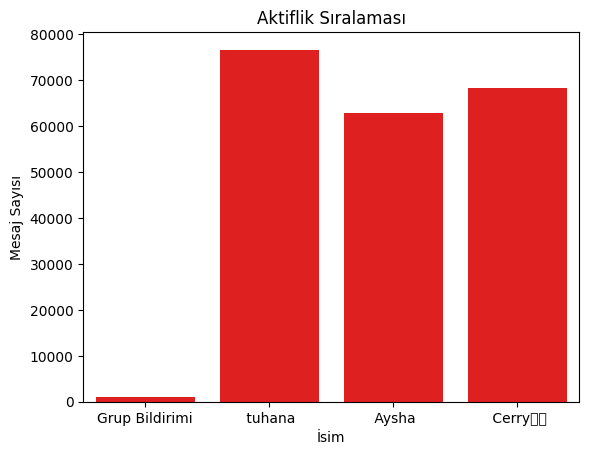

In [7]:
sns.countplot(x=df_total["Isim"],data=df_total,color="red")
plt.title('Aktiflik Sıralaması')
plt.xlabel('İsim')
plt.ylabel('Mesaj Sayısı')

plt.show()

2..**Aylara Göre Aktiflik Sıralaması**

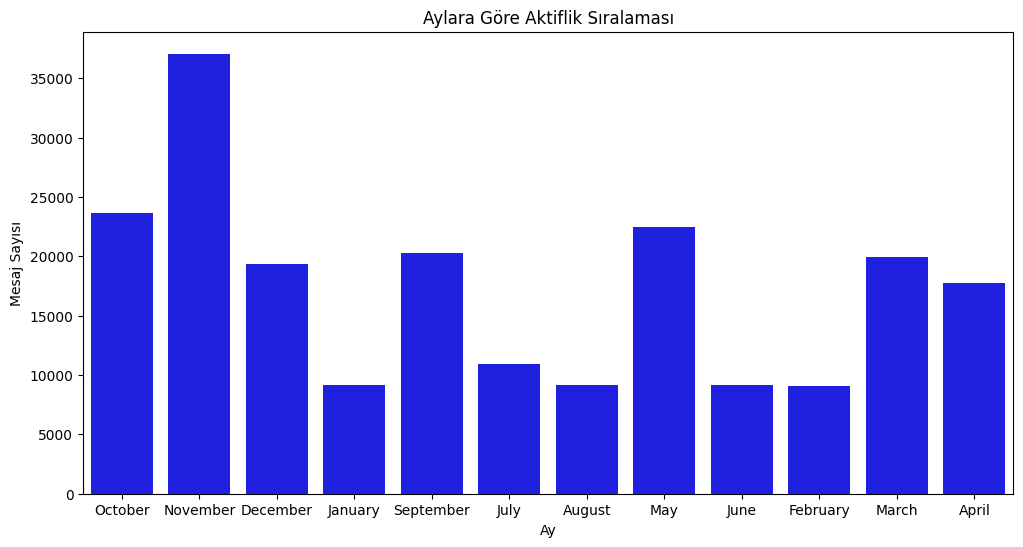

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df_total["Ay"],data=df_total,color="blue")
plt.title('Aylara Göre Aktiflik Sıralaması')
plt.xlabel('Ay')
plt.ylabel('Mesaj Sayısı')
plt.show()


3.**Günlere Göre Aktiflik Sıralaması**

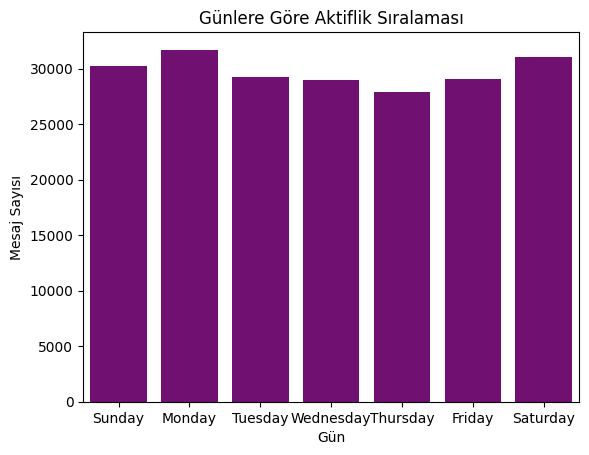

In [9]:

sns.countplot(x=df_total["Gün"],data=df_total,color="purple")
plt.title('Günlere Göre Aktiflik Sıralaması')
plt.xlabel('Gün')
plt.ylabel('Mesaj Sayısı')
plt.show()

4.**Gün içerisindeki Saatlere Göre Aktiflik Sıralaması**

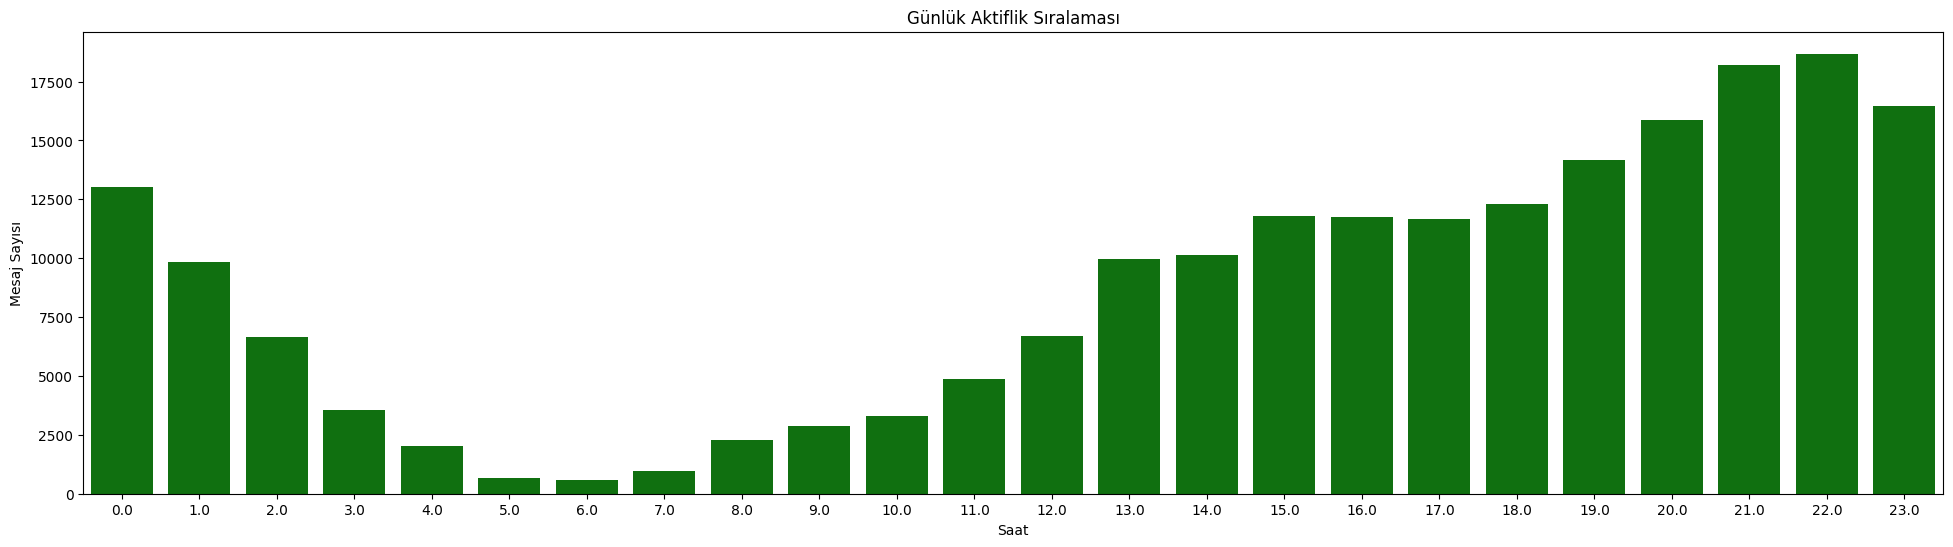

In [10]:
plt.figure(figsize=(24, 6))
sns.countplot(x=df_total["Sadece Saat"],data=df_total,color="green")
plt.title('Günlük Aktiflik Sıralaması')
plt.xlabel('Saat')
plt.ylabel('Mesaj Sayısı')
plt.show()

# 3-Metin Ön işleme


In [11]:
#medyaların çıkarılması
df_total=df_total[~df_total["Mesajlar"].str.contains("<Medya dahil edilmedi>")] 


def Metin_Ön_işleme(metin):
    metin=metin.str.lower() #küçük harfe çevirme
    metin=metin.str.replace(r'[^\w\s]', '',regex=True) #noktalama işaretlerinin çıkarılması
    metin=metin.str.replace(r'\d', '',regex=True) #sayıların çıkarılması
    return metin

df_total["Mesajlar"]=Metin_Ön_işleme(df_total["Mesajlar"])


In [12]:
## Nadir Geçen Kelimelerin atılması
temp_df=pd.Series(" ".join(df_total["Mesajlar"]).split()).value_counts()
drops=temp_df[temp_df<=1]
df_total["Mesajlar"]=df_total["Mesajlar"].apply(lambda x: " ".join(x for x in str(x).split() if x not in drops))
df_total

,Mesajlar,Isim,Tarih,Yıl,Ay,Gün,Saat,Sadece Saat,URL
0,,Grup Bildirimi,NaT,NaN,NaN,NaN,NaT,NaN,None
1,mesajlar ve aramalar uçtan uca şifrelidir what...,Grup Bildirimi,2023-10-29,2023.0,October,Sunday,00:50:00,0.0,None
2,m grubunu oluşturdunuz,Grup Bildirimi,2023-10-29,2023.0,October,Sunday,00:50:00,0.0,None
3,ay hala dindar,tuhana,2023-10-29,2023.0,October,Sunday,00:50:00,0.0,None
4,fazla devam aksanı kaydı,Aysha,2023-10-29,2023.0,October,Sunday,00:51:00,0.0,None
...,...,...,...,...,...,...,...,...,...
208927,aysha ayrıldı,Grup Bildirimi,2018-12-08,2018.0,December,Saturday,20:42:00,20.0,None
208928,aysha kişisini eklediniz,Grup Bildirimi,2018-12-22,2018.0,December,Saturday,19:21:00,19.0,None
208929,yalnızca yöneticilerin grup ayarlarını şekilde...,Grup Bildirimi,2018-12-22,2018.0,December,Saturday,19:21:00,19.0,None
208931,aysha ayrıldı,Grup Bildirimi,2020-07-07,2020.0,July,Tuesday,03:48:00,3.0,None


In [13]:
sw=stopwords.words('turkish')
df_total["Mesajlar"]=df_total["Mesajlar"].apply(lambda x:" ".join(x for x in str(x).split() if x not in sw ))
##burda nltk kütüphanesi yeterli gelmediği için kendi atılcak kelimelerimi oluşturuyorum
drop_words= [
    "asla", "aslında", "az",  "bana", "bazen", "bazı", "bazıları", "bazısı", "belki", "ben", "beni", "benim", 
    "beş", "bile", "bir", "birçoğu", "birçok", "birçokları", "biri", "birisi", "birkaç", "birkaçı", "birşey", 
    "birşeyi", "biz", "bize", "bizi", "bizim", "böyle", "böylece", "bu", "buna", "bunda", "bundan", "bunu", 
    "bunun", "burada", "bütün",  "çoğu", "çoğuna", "çoğunu", "çok", "çünkü",  "da", "daha", "de", 
    "değil", "demek", "diğer", "diğeri", "diğerleri", "diye", "dokuz", "dolayı", "dört",  "elbette", "en", 
     "fakat", "falan", "felan", "filan",  "gene", "gibi",  "hâlâ", "hangi", "hangisi", "hani", 
    "hatta", "hem", "henüz", "hep", "hepsi", "hepsine", "hepsini", "her", "her biri", "herkes", "herkese", 
    "herkesi", "hiç", "hiç kimse", "hiçbiri", "hiçbirine", "hiçbirini",  "için", "içinde", "iki", "ile", 
    "ise", "işte",  "kaç", "kadar", "kendi", "kendine", "kendini", "ki", "kim", "kime", "kimi", "kimin", 
    "kimisi",  "madem", "mı", "mi", "mu", "mu", "mü", "mü", "nasıl", "ne", "ne kadar", "ne zaman", 
    "neden", "nedir", "nerde", "nerede", "nereden", "nereye", "nesi", "neyse", "niçin", "niye",  "on", "ona", 
    "ondan", "onlar", "onlara", "onlardan", "onların", "onların", "onu", "onun", "orada", "oysa", "oysaki", 
    "öbürü", "ön", "önce", "ötürü", "öyle",  "rağmen", "sana", "sekiz", "sen", "senden", "seni", 
    "senin", "siz", "sizden", "size", "sizi", "sizin", "son", "sonra",  "şayet", "şey", "şeyden", "şeye", 
    "şeyi", "şeyler", "şimdi", "şöyle", "şu", "şuna", "şunda", "şundan", "şunlar", "şunu", "şunun",  "tabi", 
    "tamam", "tüm", "tümü",  "üç", "üzere", "var", "ve", "veya", "veyahut",  "ya", "ya da", 
    "yani", "yedi", "yerine", "yine", "yoksa",  "zaten","bi", "ben", "evet", "hayir", "mi", "galiba", "neyse", "değil", "degil", "beni", "bana", "bence", "senin", "sen", "sana", "yine", "yok", "onu", "benim", "sen", "bizim", "var", "bir", "sey", "zaten", "sonra", "icin", "kadar", "iyi", "oyle", "dedi", "mesaj", "nasil", "hic", "dedim", "silindi","bunu","bn",
"bile", "çok", "böyle", "zaman", "biraz", "diyo", "sadece", "ilk", "şimdi", "ol", "olsun", "olur", "biraz", "olsa"]



df_total["Mesajlar"]=df_total["Mesajlar"].apply(lambda x:" ".join(x for x in str(x).split() if x not in drop_words))
df_total['Mesajlar'] = df_total['Mesajlar'].apply(lambda x: x.strip())


# 4- Metin Görselleştirme
1. **Terim Frekanslarının Hesaplanması**
Bu aşamada benim verim çok büyük olduğundan dolayı metin verilerini parçalara bölerek yaptım ,aksi takdirde bazı bellek sorunlarıyla karşılaşıyordum.

In [14]:

chunk_size = 10000
chunks = [df_total[i:i + chunk_size] for i in range(0, len(df_total), chunk_size)]

results = []
for chunk in chunks:
    result_chunk = chunk["Mesajlar"].swifter.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
    results.append(result_chunk)



Pandas Apply: 100%|██████████| 3242/3242 [00:03<00:00, 932.51it/s] 


In [18]:
tf=pd.concat(results).groupby("index")[0].sum().reset_index()
tf.columns=["words", "tf"]
tf=tf[tf["words"] !=""]
tf.sort_values("tf",ascending=False).head(60)


,words,tf
2028,ay,5778.0
12688,knk,4252.0
368,aga,4248.0
5054,cok,2435.0
70,abi,1639.0
15078,of,1179.0
11716,kanka,1050.0
5012,cnm,1040.0
12600,kiz,1018.0
13637,lan,952.0


<Axes: xlabel='words'>

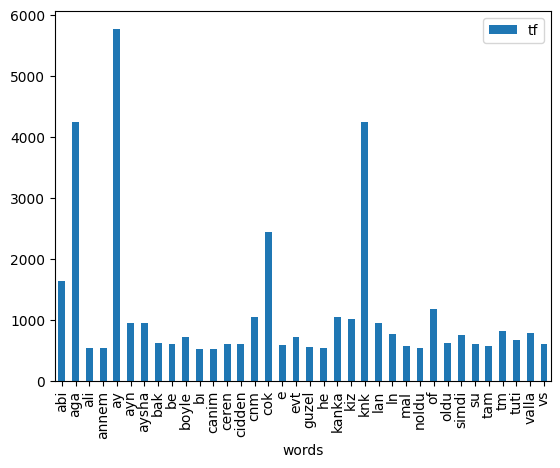

In [24]:
#bar plot
tf[tf["tf"]>500].plot.bar(x="words",y="tf")


2.**Kelime Bulutu Oluşturulması**

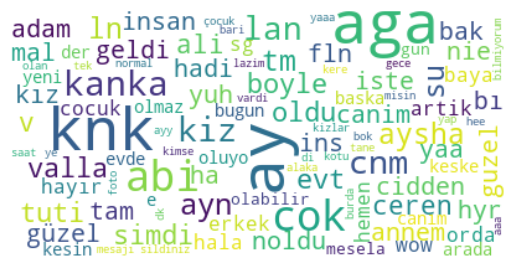

In [17]:
text= " ".join(i for i in df_total["Mesajlar"])
wordCloud=WordCloud(max_font_size=50,
                     max_words=100,
                     background_color="white").generate(text)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis("off")
plt.show()
